In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Data

In [3]:
os.chdir("..")

In [7]:
forecast_1 = pd.read_csv('data/wind_challenge/Dataset1_forecast.csv')
forecast_1.head(5)

,Time,windSpeed (m/s),windDic (degree)
0,2018-01-01 0:00,9.50241,303.854
1,2018-01-01 1:00,8.60719,301.083
2,2018-01-01 2:00,8.43270,301.583
3,2018-01-01 3:00,8.16070,301.586
4,2018-01-01 4:00,8.10899,302.583


In [13]:
forecast_1.dtypes

Time                datetime64[ns]
windSpeed (m/s)            float64
windDic (degree)           float64
dtype: object

In [9]:
forecast_1['Time'] = pd.to_datetime(forecast_1['Time'])

In [17]:
measurement_1 = pd.read_csv('data/wind_challenge/Dataset1_measurement.csv')
measurement_1.head(5)

,timeStamp,availableMW,windSpeed,windPower
0,2018-01-01 0:00,34.5,11.9,42.5118
1,2018-01-01 0:05,34.5,12,42.7067
2,2018-01-01 0:10,34.5,12,42.7067
3,2018-01-01 0:15,34.5,11.8,42.3044
4,2018-01-01 0:20,34.5,11.8,42.3044


In [18]:
measurement_1.dtypes

timeStamp      object
availableMW    object
windSpeed      object
windPower      object
dtype: object

In [19]:
measurement_1['timeStamp'] = pd.to_datetime(measurement_1['timeStamp'])

# EDA

In [24]:
#Shape
forecast_1.shape

(7388, 3)

In [25]:
forecast_1.describe()

,windSpeed (m/s),windDic (degree)
count,7388.000000,7388.000000
mean,5.913642,220.200515
std,2.425454,86.615206
min,0.230865,2.082125
25%,4.172105,165.722657
50%,5.821419,224.268312
75%,7.437166,298.882469
max,15.296413,355.974000


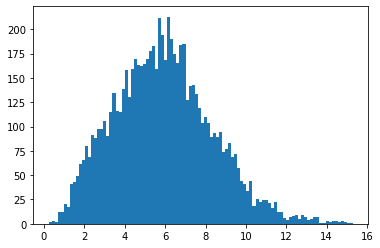

In [28]:
plt.hist(forecast_1['windSpeed (m/s)'], bins=100)
plt.show()

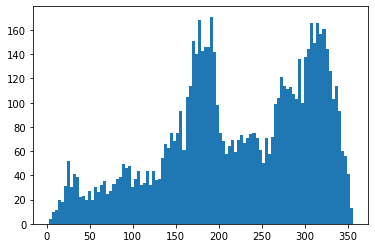

In [29]:
plt.hist(forecast_1['windDic (degree)'], bins=100)
plt.show()

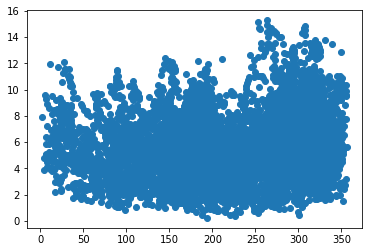

In [39]:
plt.scatter(forecast_1['windDic (degree)'], forecast_1['windSpeed (m/s)'])
plt.show()

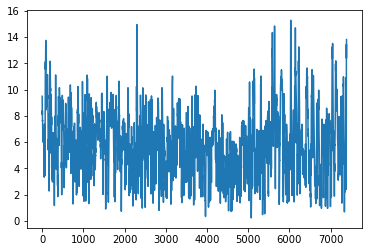

In [31]:
plt.plot(forecast_1['windSpeed (m/s)'])
plt.show()

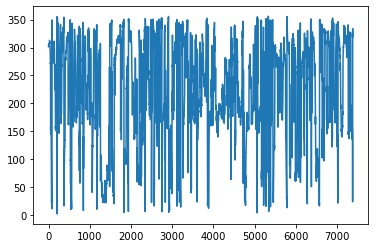

In [32]:
plt.plot(forecast_1['windDic (degree)'])
plt.show()

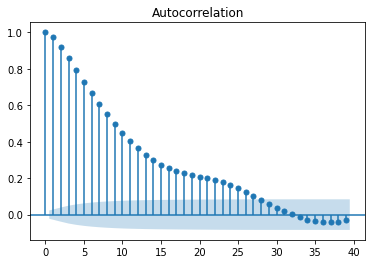

In [34]:
plot_acf(forecast_1['windSpeed (m/s)'])
plt.show()

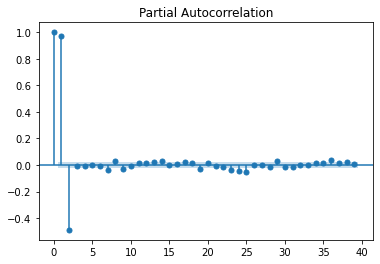

In [36]:
plot_pacf(forecast_1['windSpeed (m/s)'])
plt.show()

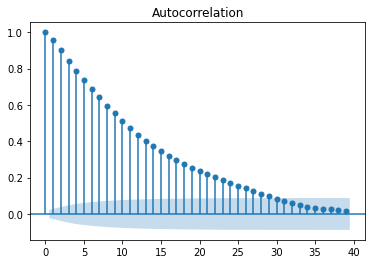

In [37]:
plot_acf(forecast_1['windDic (degree)'])
plt.show()

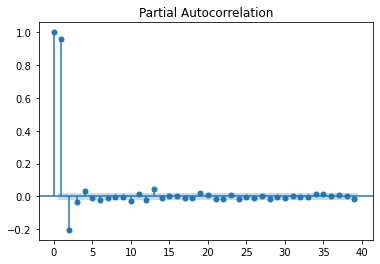

In [38]:
plot_pacf(forecast_1['windDic (degree)'])
plt.show()

In [42]:
forecast_1['month'] = forecast_1['Time'].dt.month
forecast_1['day'] = forecast_1['Time'].dt.day

In [45]:
forecast_1.corr()

,windSpeed (m/s),windDic (degree),month,day
windSpeed (m/s),1.000000,0.195438,-0.055331,0.033138
windDic (degree),0.195438,1.000000,0.044153,0.075478
month,-0.055331,0.044153,1.000000,0.046407
day,0.033138,0.075478,0.046407,1.000000


In [44]:
forecast_1.groupby('month').mean()

,windSpeed (m/s),windDic (degree),day
month,,,
1,6.992116,237.289178,16.535714
2,6.216903,227.473194,14.500000
3,6.821855,167.773654,10.650206
4,5.712578,212.009182,21.243243
5,5.616602,230.705080,16.581738
6,5.462457,219.213973,15.500000
7,5.211323,218.543494,16.000000
8,4.434299,212.754680,16.000000
9,5.837101,184.682713,23.533742


In [46]:
forecast_day = forecast_1.groupby('day').mean().reset_index()

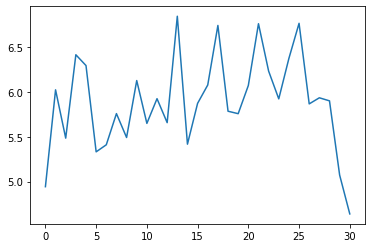

In [48]:
plt.plot(forecast_day['windSpeed (m/s)'])

In [49]:
forecast_day_month = forecast_1.groupby(['month','day']).mean().reset_index()

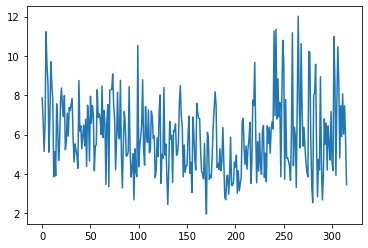

In [50]:
plt.plot(forecast_day_month['windSpeed (m/s)'])

In [54]:
forecast_1['speed_change'] = forecast_1['windSpeed (m/s)'].pct_change()
forecast_1['wind_change'] = forecast_1['windDic (degree)'].pct_change()

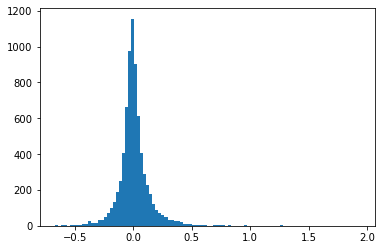

In [55]:
plt.hist(forecast_1['speed_change'], bins=100)
plt.show()

In [62]:
measurement_1['availableMW'] = np.where(measurement_1['availableMW']=='\\N', 
                                        np.nan,
                                        measurement_1['availableMW']
                                       )
measurement_1['windSpeed'] = np.where(measurement_1['windSpeed']=='\\N', 
                                        np.nan,
                                        measurement_1['windSpeed']
                                       )
measurement_1['windPower'] = np.where(measurement_1['windPower']=='\\N', 
                                        np.nan,
                                        measurement_1['windPower']
                                       )

In [63]:
measurement_1['availableMW'] = measurement_1['availableMW'].astype('float')
measurement_1['windSpeed'] = measurement_1['windSpeed'].astype('float')
measurement_1['windPower'] = measurement_1['windPower'].astype('float')

In [64]:
measurement_1.to_csv('processed/Dataset1_measurement_')

,timeStamp,availableMW,windSpeed,windPower
0,2018-01-01 00:00:00,34.5,11.9,42.5118
1,2018-01-01 00:05:00,34.5,12.0,42.7067
2,2018-01-01 00:10:00,34.5,12.0,42.7067
3,2018-01-01 00:15:00,34.5,11.8,42.3044
4,2018-01-01 00:20:00,34.5,11.8,42.3044
...,...,...,...,...
88936,2018-12-30 23:40:00,10.5,3.3,0.0000
88937,2018-12-30 23:45:00,5.2,3.1,0.0000
88938,2018-12-30 23:50:00,6.0,3.1,0.0000
88939,2018-12-30 23:55:00,4.8,3.1,0.0000


In [ ]:
measurement_1.